In [1]:
import os
from dotenv import load_dotenv
import numpy as np
import tensorflow as tf
import pandas as pd
import datetime

load_dotenv(override=True)

DATA_PATH = os.getenv('DATA_PATH')
print(DATA_PATH)

# Choose subontology (CCO, MFO or BPO)
SO = 'CCO'

2023-05-17 17:52:17.305170: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 17:52:17.764471: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


/mnt/e/ML/cafa-5-protein-function-prediction


## Reading fasta, obo and tsv files

In [2]:
from Bio import SeqIO

sequences = [rec.seq for rec in SeqIO.parse(os.path.join(DATA_PATH, "Train/train_sequences.fasta"),"fasta")]
ids = [rec.id for rec in SeqIO.parse(os.path.join(DATA_PATH, "Train/train_sequences.fasta"),"fasta")]

In [3]:
print("There are {} sequences in the dataset.".format(len(sequences)))

There are 142246 sequences in the dataset.


In [4]:
import networkx
import obonet

# Read the taxrank ontology
url = os.path.join(DATA_PATH, "Train/go-basic.obo")
graph = obonet.read_obo(url)



In [5]:
df = pd.read_csv(os.path.join(DATA_PATH, "Train/train_terms.tsv"), sep='\t')

dfSO = df.loc[df["aspect"]==SO]
uniqueTerms = dfSO["term"].unique()
termsArr = list(dfSO["term"].to_numpy())

uniqueTermsDict={}
for i,el in enumerate(uniqueTerms):
    uniqueTermsDict[el] = i
    
print(dfSO.shape)
df=dfSO

(1196017, 3)


Test for the first entry:

In [6]:
df.set_index("EntryID", inplace=True)
df.head(10)

,term,aspect
EntryID,,
A0A021WW32,GO:0099086,CCO
A0A021WW32,GO:0000228,CCO
A0A021WW32,GO:0005622,CCO
A0A021WW32,GO:0043226,CCO
A0A021WW32,GO:0000792,CCO
A0A021WW32,GO:0000795,CCO
A0A021WW32,GO:0000785,CCO
A0A021WW32,GO:0043231,CCO
A0A021WW32,GO:0032991,CCO


In [7]:
%timeit df.loc["A0A021WW32"]

19.5 µs ± 585 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
testID = df.index.to_list()[0]

In [9]:
df.loc[testID]

,term,aspect
EntryID,,
A0A021WW32,GO:0099086,CCO
A0A021WW32,GO:0000228,CCO
A0A021WW32,GO:0005622,CCO
A0A021WW32,GO:0043226,CCO
A0A021WW32,GO:0000792,CCO
A0A021WW32,GO:0000795,CCO
A0A021WW32,GO:0000785,CCO
A0A021WW32,GO:0043231,CCO
A0A021WW32,GO:0032991,CCO


In [10]:
np.unique(df["aspect"].to_numpy())

array(['CCO'], dtype=object)

## GO analysis

In [11]:
item_counts = df["term"].value_counts()
print(item_counts[0:20])

GO:0005575    92912
GO:0110165    91286
GO:0005622    70785
GO:0043226    60883
GO:0043229    58315
GO:0043227    55452
GO:0005737    53193
GO:0043231    52218
GO:0005634    28932
GO:0016020    25768
GO:0071944    20467
GO:0005829    18216
GO:0005886    16738
GO:0032991    16657
GO:0043228    16145
GO:0043232    16124
GO:0031974    15696
GO:0043233    15694
GO:0070013    15688
GO:0031981    13510
Name: term, dtype: int64


In [12]:
id_to_name = {id_: data.get('name') for id_, data in graph.nodes(data=True)}
name_to_id = {data['name']: id_ for id_, data in graph.nodes(data=True) if 'name' in data}
print(id_to_name['GO:0031981'] )

nuclear lumen


In [13]:
print(id_to_name['GO:0070013'] )
print(networkx.ancestors(graph, 'GO:0070013'))
print(networkx.descendants(graph, 'GO:0070013'))

paths = networkx.all_simple_paths(
    graph,
    source='GO:0070013',
    target=name_to_id['molecular_function']
)

for path in paths:
    print('•', ' ⟶ '.join(id_to_name[node] for node in path))

intracellular organelle lumen
{'GO:0033018', 'GO:0005761', 'GO:0005730', 'GO:0000328', 'GO:0101019', 'GO:0099086', 'GO:0031610', 'GO:0072589', 'GO:0000800', 'GO:0000176', 'GO:0001650', 'GO:0034974', 'GO:0031973', 'GO:0070931', 'GO:0034422', 'GO:0005638', 'GO:0070822', 'GO:0000795', 'GO:0097504', 'GO:0031601', 'GO:0005675', 'GO:0034457', 'GO:0036224', 'GO:0031298', 'GO:0008024', 'GO:0034455', 'GO:0034466', 'GO:0097489', 'GO:0000118', 'GO:0005674', 'GO:0005655', 'GO:0110016', 'GO:0000802', 'GO:1990836', 'GO:0017133', 'GO:0033557', 'GO:0016591', 'GO:0030062', 'GO:0043202', 'GO:0062246', 'GO:0031972', 'GO:0062113', 'GO:0031096', 'GO:0061201', 'GO:0034469', 'GO:0005962', 'GO:0005796', 'GO:0043625', 'GO:0000262', 'GO:0106176', 'GO:0034467', 'GO:0001651', 'GO:0034099', 'GO:0035097', 'GO:0071682', 'GO:0070545', 'GO:0019910', 'GO:0033276', 'GO:0034495', 'GO:0032798', 'GO:0044665', 'GO:0016581', 'GO:0000500', 'GO:0008023', 'GO:0106098', 'GO:0097486', 'GO:0000438', 'GO:0000817', 'GO:0042719', 'GO

## Label encoding

The task is a multilabel classification: The output has several possible targets (Gene Ontologies) but each can only be 1 (existing) or 0 (non existing)

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer
import pickle

topGOs= item_counts
topGOs=topGOs.index.to_list()

mlb = MultiLabelBinarizer()
mlb.fit([topGOs])

dftest=df.loc[testID]
indices = dftest["term"].to_numpy()
print(indices)
print(mlb.transform([indices]))
print(len(mlb.classes_))

with open(os.path.join(DATA_PATH,'MLB_'+SO+'.pkl'), 'wb') as f:
    pickle.dump(mlb, f)

['GO:0099086' 'GO:0000228' 'GO:0005622' 'GO:0043226' 'GO:0000792'
 'GO:0000795' 'GO:0000785' 'GO:0043231' 'GO:0032991' 'GO:0043229'
 'GO:0043232' 'GO:0005634' 'GO:0005705' 'GO:0043228' 'GO:0031981'
 'GO:0000793' 'GO:0098687' 'GO:0043233' 'GO:0005700' 'GO:0005575'
 'GO:0044815' 'GO:0005694' 'GO:0000794' 'GO:0008278' 'GO:0110165'
 'GO:0005721' 'GO:0070013' 'GO:0043227' 'GO:0000775' 'GO:0031974']
[[0 0 0 ... 0 0 0]]
2957


## Amino acids encoding

In [15]:
aminos_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'X']

In [16]:
aa_dict = {'A': 1, 'B':24, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'O': 21, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'U': 22, 'V': 18, 'W': 19, 'Y': 20, 'X':30, 'Z':23}

## Build Dataset

In [17]:
seqLengths = [len(seq) for seq in sequences]
maxLen = max(seqLengths)
print("The max. length of the sequences is {}".format(maxLen))

The max. length of the sequences is 35375


Get the sequences that have at least one GO of the sub-ontology 

In [18]:

dfAll=pd.read_csv(os.path.join(DATA_PATH, "Train/train_terms.tsv"), sep='\t')

soEntries = dfAll.loc[dfAll["aspect"]==SO]
soEntryIds = soEntries["EntryID"].unique()

# print(len(seqEntries))
print(soEntryIds)

SoSequences = []
for entry in soEntryIds:
    SoSequences.append(sequences[ids.index(entry)])

print(len(SoSequences))
dfAll.set_index("EntryID", inplace=True)

['A0A021WW32' 'A0A021WZA4' 'A0A023GPJ3' ... 'X6RLP6' 'X6RLR1' 'X6RM59']
92912


In [19]:
import warnings

TRAIN_VAL_SPLIT = 0.7

#Use numpy vectorize to speed up the mapping (hopefully)
mapping = lambda x: aa_dict[x]
vectMapping = np.vectorize(mapping)

# Shuffle the data
import random
random.seed(516213)
c = list(zip(sequences, ids))
random.shuffle(c)
sequencesShuffle, idsShuffle = zip(*c)

#reduce data for now
# sequencesShuffle = sequencesShuffle[0:10000]
# idsShuffle = idsShuffle[0:10000]

#Train Validation Split
split = int(np.floor(len(sequencesShuffle)*TRAIN_VAL_SPLIT))
print(split)
trainSeq = sequencesShuffle[0:split]
valSeq = sequencesShuffle[split+1:]
trainIds = idsShuffle[0:split]
valIds = idsShuffle[split+1:]


def generator(padding=True):
    for i,seq in enumerate(trainSeq):
        entryId = trainIds[i]
        
        if entryId in soEntryIds:
          labelData = df.loc[entryId]
          # indices = labelData["termToken"].to_numpy()
          indices = labelData["term"].to_numpy()
        else:
          indices=[]

        with warnings.catch_warnings():
            #supress the warnings for unknown classes
            warnings.simplefilter("ignore")
            y = mlb.transform([indices])
        
        arr = np.array(seq)
        mappedArr = vectMapping(arr)
        if padding:
            padWidth = maxLen - arr.size
            mappedArr = np.pad(mappedArr, (0, padWidth))
        yield mappedArr,y[0]

def generatorVal(padding=True):
    for i,seq in enumerate(valSeq):
        entryId = valIds[i]
        if entryId in soEntryIds:
          labelData = df.loc[entryId]
          # indices = labelData["termToken"].to_numpy()
          indices = labelData["term"].to_numpy()
        else:
          indices=[]

        with warnings.catch_warnings():
            #supress the warnings for unknown classes
            warnings.simplefilter("ignore")
            y = mlb.transform([indices])
        
        arr = np.array(seq)
        mappedArr = vectMapping(arr)
        if padding:
            padWidth = maxLen - arr.size
            mappedArr = np.pad(mappedArr, (0, padWidth))
        yield mappedArr,y[0]
        

99572


In [20]:
g = generator()
test = next(g)
print("The first sample sequence: {}".format(test[0]))
print("The first sample has {} classes".format(np.count_nonzero(test[1])))

The first sample sequence: [11 16  3 ...  0  0  0]
The first sample has 0 classes


## Tensorflow Classification

In [21]:
import tensorflow as tf


dataset = tf.data.Dataset.from_generator(generator, output_signature=(
         tf.TensorSpec(shape=(maxLen,), dtype=tf.int32),
         tf.TensorSpec(shape=(len(mlb.classes_),), dtype=tf.int32)))
print(list(dataset.take(1)))

datasetVal = tf.data.Dataset.from_generator(generatorVal, output_signature=(
         tf.TensorSpec(shape=(None,), dtype=tf.int32),
         tf.TensorSpec(shape=(len(mlb.classes_),), dtype=tf.int32)))

2023-05-17 17:53:21.660527: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-17 17:53:21.680648: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-17 17:53:21.680955: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-17 17:53:21.682179: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-17 17:53:21.682485: I tensorflow/compile

[(<tf.Tensor: shape=(35375,), dtype=int32, numpy=array([11, 16,  3, ...,  0,  0,  0], dtype=int32)>, <tf.Tensor: shape=(2957,), dtype=int32, numpy=array([0, 0, 0, ..., 0, 0, 0], dtype=int32)>)]


In [22]:
%load_ext tensorboard


In [23]:
from tensorflow.keras import layers

VOCAB_SIZE=len(aa_dict)
EMBED_DIM=100

def createModel():
    inputs = tf.keras.Input(shape=(maxLen,))
    x=layers.Embedding(VOCAB_SIZE, EMBED_DIM, mask_zero=True, name="embedding")(inputs)
    x=layers.GlobalAveragePooling1D()(x)
    x=layers.Reshape((EMBED_DIM,1))(x)
    x=layers.Conv1D(8, 7)(x)
    x=layers.Conv1D(8, 7)(x)
    x=layers.Conv1D(8, 7)(x)
    x=layers.Conv1D(16, 7)(x)
    x=layers.Conv1D(16, 7)(x)
    x=layers.Conv1D(16, 7, strides=2)(x)
    x=layers.Conv1D(16, 7, strides=2)(x)
    # x=layers.Conv1D(32, 5, activation=tf.keras.activations.relu)(x)
    # x=layers.Conv1D(32, 5, activation=tf.keras.activations.relu)(x)
    # x=layers.Conv1D(32, 5, activation=tf.keras.activations.relu)(x)
    x=layers.Flatten()(x)
    x=layers.Dense(32)(x)
    x=layers.LeakyReLU()(x)
    x=layers.Dense(32)(x)
    x=layers.LeakyReLU()(x)
    outputs=layers.Dense(len(mlb.classes_), activation=tf.keras.activations.sigmoid)(x)
    # outputs=layers.Softmax()(x)

    return tf.keras.Model(inputs=inputs, outputs=outputs, name="embedConvModel")

model = createModel()

model.summary()


Model: "embedConvModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35375)]           0         
                                                                 
 embedding (Embedding)       (None, 35375, 100)        2500      
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 reshape (Reshape)           (None, 100, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 94, 8)             64        
                                                                 
 conv1d_1 (Conv1D)           (None, 88, 8)             456       
                                                    

In [27]:

VOCAB_SIZE=len(aa_dict)
EMBED_DIM=200

def createRnnModel():
    inputs = tf.keras.Input(shape=(maxLen,))
    x = tf.keras.layers.Masking(0)(inputs)
    x=layers.Embedding(VOCAB_SIZE, EMBED_DIM, name="embedding")(x)

    # x = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(x)
    # x = layers.Bidirectional(layers.GRU(16, return_sequences=True))(x)
    x = layers.Bidirectional(layers.GRU(16))(x)
    # x = layers.LSTM(32)(x)
    x = layers.Dense(16)(x)
    x = layers.LeakyReLU()(x)
    outputs=layers.Dense(len(mlb.classes_), activation=tf.keras.activations.sigmoid)(x)
    # outputs=layers.Softmax()(x)

    return tf.keras.Model(inputs=inputs, outputs=outputs, name="embedRnnModel")

# model = createRnnModel()

# model.summary()

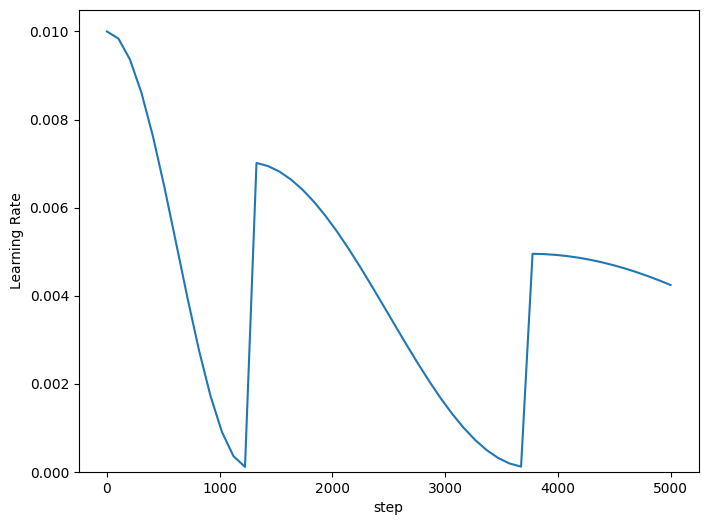

In [30]:
import matplotlib.pyplot as plt
#Learning rate schedule
initial_learning_rate = 0.01
decaySteps=5000
lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(initial_learning_rate, first_decay_steps=decaySteps/4,
                                                                t_mul=2.0, m_mul=0.7, alpha=0.01)
# lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
#     initial_learning_rate, decay_steps=decaySteps, alpha=0.01)
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,decay_steps=decaySteps,decay_rate=0.9,staircase=False)
step = np.linspace(0,decaySteps)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
# plt.yscale("log")
plt.plot(step, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('step')
_ = plt.ylabel('Learning Rate')

In [31]:
import tensorflow_addons as tfa

BATCH_SIZE=32
LOG_INTERVAL=10
epochs = 10
saveModel=True


print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

log_dir = "./logs/"+model.name+"/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+"_"+SO
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,
                                                      write_graph=True, update_freq=5)


summary_writer = tf.summary.create_file_writer(log_dir)

# Instantiate an optimizer .
# optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
# optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
optimizer = tf.keras.optimizers.AdamW(learning_rate=lr_schedule)

# Instantiate a loss function.
loss_fn = tf.keras.losses.BinaryCrossentropy()

train_acc_metric = tf.keras.metrics.BinaryAccuracy()
train_f1_metric = tfa.metrics.F1Score(num_classes=len(mlb.classes_), threshold=0.5, average="micro")
val_acc_metric = tf.keras.metrics.BinaryAccuracy()
val_f1_metric = tfa.metrics.F1Score(num_classes=len(mlb.classes_), threshold=0.5, average="micro")

batchedDataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
batchedDatasetVal = datasetVal.batch(BATCH_SIZE, drop_remainder=False)

batchedDataset = batchedDataset.cache(os.path.join(DATA_PATH, "datasetCache"+SO))
batchedDatasetVal = batchedDatasetVal.cache(os.path.join(DATA_PATH, "datasetCacheVal"+SO))

@tf.function()
def trainStep(x_batch_train, y_batch_train):
    # Open a GradientTape to record the operations run
    # during the forward pass, which enables auto-differentiation.
    with tf.GradientTape() as tape:

        # Run the forward pass of the layer.
        # The operations that the layer applies
        # to its inputs are going to be recorded
        # on the GradientTape.
        probs = model(x_batch_train, training=True) 

        # Compute the loss value for this minibatch.
        loss_value = loss_fn(y_batch_train, probs)

    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss.
    grads = tape.gradient(loss_value, model.trainable_weights)
    #Gradient clipping
    # grads = [tf.clip_by_norm(g, 2.0) for g in grads]

    # Run one step of gradient descent by updating
    # the value of the variables to minimize the loss.
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    train_acc_metric.update_state(y_batch_train, probs)
    train_f1_metric.update_state(y_batch_train, probs)
    return loss_value, grads

maxStep=0

for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch+1,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(batchedDataset):

        loss_value, grads=trainStep(x_batch_train,y_batch_train)

        # Log 
        if step % LOG_INTERVAL == 0:
            template = 'Epoch {}/Step {}, Loss: {:.5f}, Accuracy: {:.5f}, F1: {:.4f}, lr: {:.5f}'
            print (template.format(epoch+1, step,loss_value, 
                                    train_acc_metric.result(),train_f1_metric.result(), optimizer.learning_rate.numpy()))
            # print([tf.norm(grad, ord=2).numpy() for grad in grads])
            with summary_writer.as_default():
                tf.summary.scalar('loss', loss_value, step=maxStep*epoch+step)
                tf.summary.scalar('accuracy', train_acc_metric.result(), step=maxStep*epoch+step)
                tf.summary.scalar('f1', train_f1_metric.result(), step=maxStep*epoch+step)
                tf.summary.scalar('learning rate', optimizer.learning_rate.numpy(), step=maxStep*epoch+step)
                summary_writer.flush()

    
    train_acc_metric.reset_states()
    train_f1_metric.reset_states()

    maxStep=step

    print("Epoch finished. Start validation")
    for x_batch_val, y_batch_val in batchedDatasetVal:
        valProbs = model(x_batch_val, training=False)
        # Update val metrics
        val_acc_metric.update_state(y_batch_val, valProbs)
        val_f1_metric.update_state(y_batch_val, valProbs)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    val_f1 = val_f1_metric.result()
    val_f1_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))
    with summary_writer.as_default():
        tf.summary.scalar('valAcc', float(val_acc), step=epoch)
        tf.summary.scalar('valF1', float(val_f1), step=epoch)
        summary_writer.flush()
    if saveModel:
      model.save(os.path.join(DATA_PATH, "model_"+SO+"_epoch_{}_valAcc{:.3f}".format(epoch, float(val_acc))))

Num GPUs Available:  1

Start of epoch 1


2023-05-17 18:03:53.283858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/Step 0, Loss: 0.00633, Accuracy: 0.99820, F1: 0.2735, lr: 0.01000
Epoch 1/Step 10, Loss: 0.01295, Accuracy: 0.90675, F1: 0.0170, lr: 0.01000
Epoch 1/Step 20, Loss: 0.00781, Accuracy: 0.94983, F1: 0.0320, lr: 0.00999
Epoch 1/Step 30, Loss: 0.01420, Accuracy: 0.96518, F1: 0.0369, lr: 0.00999
Epoch 1/Step 40, Loss: 0.00770, Accuracy: 0.97305, F1: 0.0452, lr: 0.00998
Epoch 1/Step 50, Loss: 0.00877, Accuracy: 0.97785, F1: 0.0532, lr: 0.00996
Epoch 1/Step 60, Loss: 0.00885, Accuracy: 0.98104, F1: 0.0606, lr: 0.00994


In [ ]:
# for layer in model.layers: print(layer.get_config(), layer.get_weights())

In [ ]:

probs= model.predict(tf.expand_dims(list(datasetVal.take(32))[0][0], 0))
prediction= [1 if p > 0.5 else 0 for p in probs[0]]
probabilities= probs[probs>0.5]
# classes = np.argwhere(prediction)
print(mlb.inverse_transform(np.array([prediction])))
print(probabilities)
